## Лабораторная работа #5 по курсу "Численные методы"
### Выполнил Фаттяхетдинов Сильвестр, группа М8О-408Б-20
### Вариант 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [2]:
N = 10
K = 100
T = 1
L = np.pi / 2
H = L/N
TAU = T/K
SIGMA = TAU/(H ** 2)
x = np.linspace(0,L,N)
t = np.linspace(0,T,K)



In [3]:
def read_txt_file(filename: str) -> list[list[float]]:
    with open(filename, 'r') as f:
        matrix = [list(map(float, line.split())) for line in f]
    return matrix

analytical_sol = read_txt_file("analytical_sol.txt")
crank_nicholson_sol = read_txt_file("crank_nicholson_sol.txt")
explicit_sol_1 = read_txt_file("explicit_sol_1.txt")
explicit_sol_2 = read_txt_file("explicit_sol_2.txt")
explicit_sol_3 = read_txt_file("explicit_sol_3.txt")
implicit_sol = read_txt_file("implicit_sol.txt")

solutions = {
    'analytical_sol': analytical_sol,
    'crank_nicholson_sol': crank_nicholson_sol,
    'explicit_sol_1': explicit_sol_1,
    'explicit_sol_2': explicit_sol_2,
    'explicit_sol_3': explicit_sol_3,
    'implicit_sol': implicit_sol
}


In [4]:
def max_abs_error(A: np.ndarray, B: np.ndarray) -> float:
    return abs(A - B).max()



In [5]:
def plot_solutions(
    solutions: dict,
    time: float,
    x: np.ndarray,
    t: np.ndarray,
) -> None:
    t_id = abs(t - time).argmin()
    plt.figure(figsize=(16, 9))
    for method_name, solution in solutions.items():
        plt.plot(x, solution[t_id], label=method_name)
    plt.legend()
    plt.grid()
    plt.show()



In [6]:
def plot_errors(
    solutions: dict,
    t: np.ndarray,
) -> None:

    plt.figure(figsize=(16, 9))
    for method_name, solution in solutions.items():
        errors_array = np.array([
            max_abs_error(np.array(solution[i]), np.array(solutions['analytical_sol'][i]))
            for i in range(len(t))
        ])
        plt.plot(t, errors_array, label=method_name)

    plt.xlabel('time')
    plt.ylabel('Max abs error')

    plt.legend()
    plt.grid()
    plt.show()



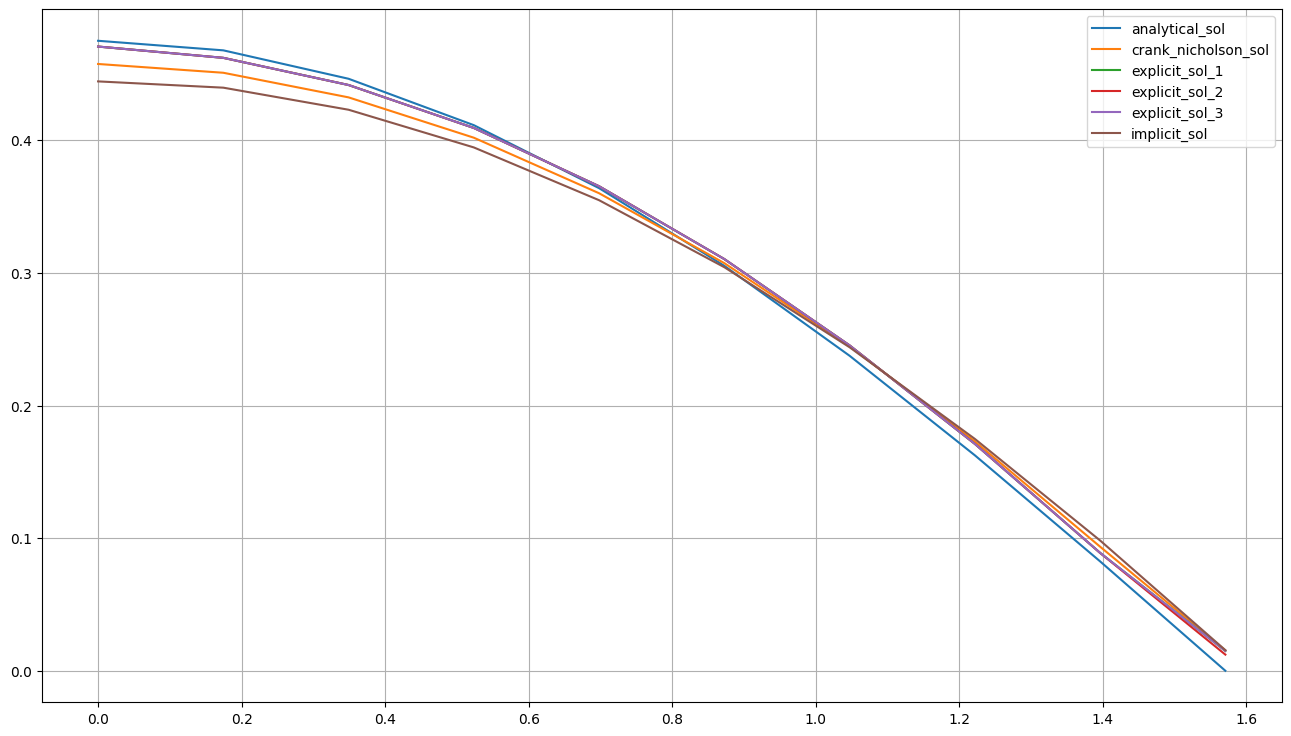

In [7]:
plot_solutions(
    solutions,
    0.5,
    x,
    t,
)


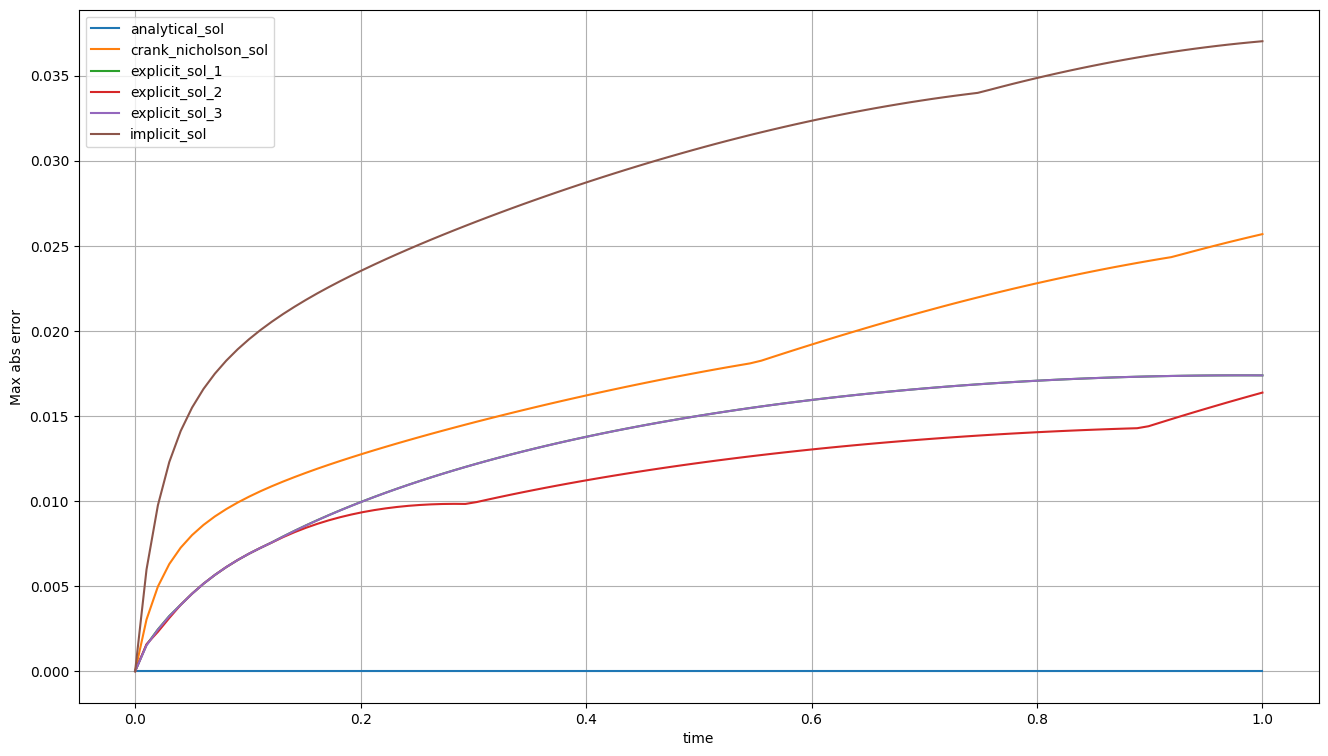

In [8]:

plot_errors(
    solutions,
    t
)
